In [7]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

f = open('./datasets/fake_dataset_v11.csv', 'r')
data=f.read()
f.close()

from static.scripts.local_algos import local_dp,csv_to_df

dp_output = local_dp(3, 'disease', data)

results = json.loads(dp_output)

ldp_freq = np.array([results[i] for i in results])

ldp_freq

array([ 7433,  3426, 14044,  7140,  7457,  6865,  6833,  7090,  7041,
        7032, 10528,  7507,  6849])

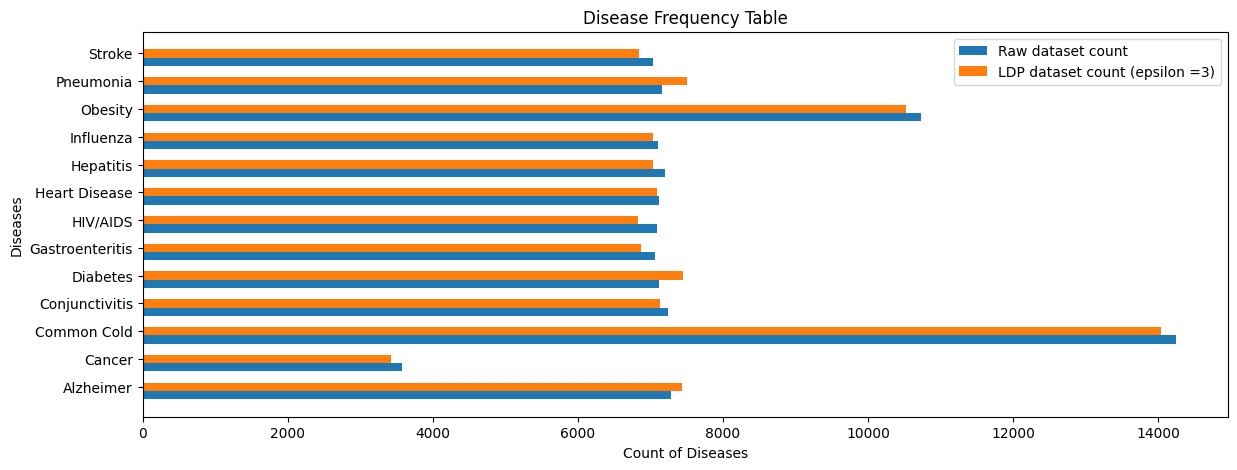

In [11]:

df=pd.read_csv('datasets/fake_dataset_v11.csv')

df=df.groupby('disease',as_index=False).count().rename(columns={"id": "count"})

real_freq = np.nan_to_num(df['count'])

domain=np.array(df['disease'])
x_axis = np.arange(len(domain))
barwidth = 0.3

fig, ax = plt.subplots(figsize=(14, 5))

plt.yticks(x_axis,domain)
ax.barh(x_axis-barwidth,real_freq, barwidth, label='Raw dataset count',)
ax.barh(x_axis  , ldp_freq, barwidth,label='LDP dataset count (epsilon =3)')



##forks
#norm_est_freq
plt.title("Disease Frequency Table")
plt.xlabel("Count of Diseases")
plt.ylabel("Diseases")
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error


nb_seed = 15

lst_eps = np.arange(0.5, 5.1, 0.5)

def ldp(esp):
  dp_output = local_dp(esp, 'disease', data)
  results = json.loads(dp_output)
  ldp_freq = np.array([results[i] for i in results])
  ##ldp_norm_freq = np.array(array / sum(array))
  return ldp_freq


dic_mse = {seed: 
               {
                "Test": [],
               } 
               for seed in range(nb_seed)
          }

for seed in range(nb_seed):
    print('Starting w/ seed:', seed)

    for eps in lst_eps:
        est_freq=ldp(eps)
        dic_mse[seed]["Test"].append(mean_squared_error(real_freq, est_freq))

Starting w/ seed: 0
Starting w/ seed: 1
Starting w/ seed: 2
Starting w/ seed: 3
Starting w/ seed: 4
Starting w/ seed: 5
Starting w/ seed: 6
Starting w/ seed: 7
Starting w/ seed: 8
Starting w/ seed: 9
Starting w/ seed: 10
Starting w/ seed: 11
Starting w/ seed: 12
Starting w/ seed: 13
Starting w/ seed: 14


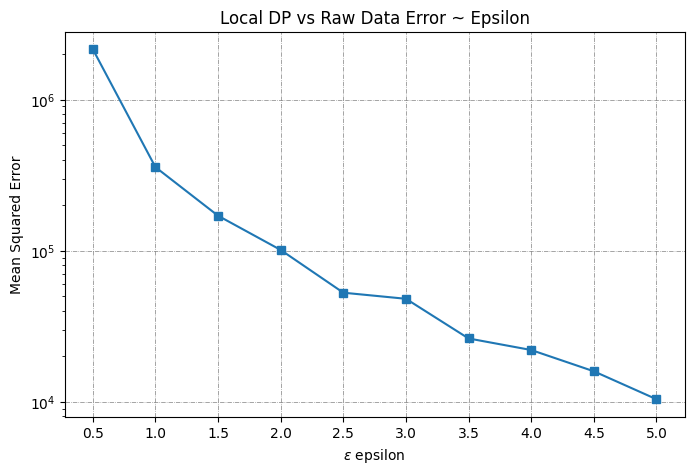

In [12]:
plt.figure(figsize=(8,5))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.5)
plt.plot(np.mean([dic_mse[seed]["Test"] for seed in range(nb_seed)], axis=0),label='OUE',marker='s')

plt.yscale('log')
plt.xlabel('$\epsilon$ epsilon')
plt.ylabel('Mean Squared Error')
plt.xticks(range(len(lst_eps)), lst_eps)
plt.title("Local DP vs Raw Data Error ~ Epsilon")
plt.show()

In [2]:
import pydp as dp
from pydp.algorithms.laplacian import *
import random
import numpy as np # CAN DELETE
from scripts.algorithms.globaldp.global_algos import global_bounded_algo
import statistics

# Generate list of random values, 0 - 100
vals = []

for i in range(0, 10000):
    val = random.randint(0, 100)
    vals.append(val)

# True statistics
real_gb_mean = statistics.mean(vals)

nb_seed_gb = 15

lst_eps = np.arange(0.5, 5.1, 0.5)

dic_mse_gb = {seed: 
               {
                "gb_test": [],
               } 
               for seed in range(nb_seed_gb)
          }

for seed in range(nb_seed_gb):
    print('Starting w/ seed:', seed)

    for gb_eps in lst_eps:
        gb_est_mean=global_bounded_algo(vals, gb_eps, 'bounded_mean')
        dic_mse_gb[seed]["gb_test"].append(np.square(np.subtract(real_gb_mean, gb_est_mean)))




Starting w/ seed: 0
Starting w/ seed: 1
Starting w/ seed: 2
Starting w/ seed: 3
Starting w/ seed: 4
Starting w/ seed: 5
Starting w/ seed: 6
Starting w/ seed: 7
Starting w/ seed: 8
Starting w/ seed: 9
Starting w/ seed: 10
Starting w/ seed: 11
Starting w/ seed: 12
Starting w/ seed: 13
Starting w/ seed: 14


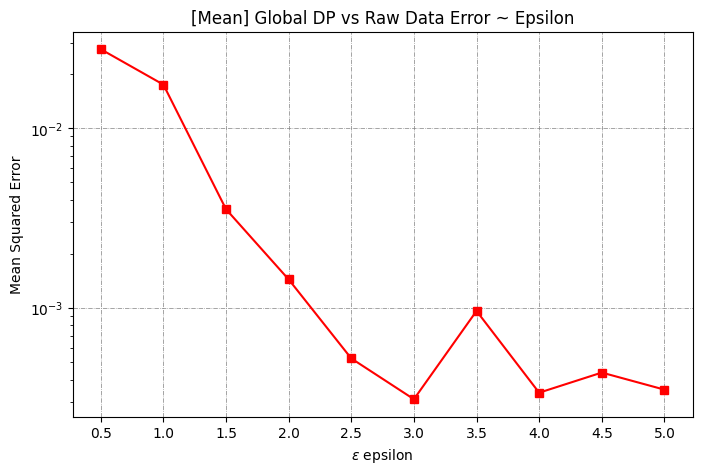

In [4]:
import matplotlib.pyplot as plt # CAN DELETE

plt.figure(figsize=(8,5))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.5)
plt.plot(np.mean([dic_mse_gb[seed]["gb_test"] for seed in range(nb_seed_gb)], axis=0),label='OUE',marker='s',color="red")

plt.yscale('log')
plt.xlabel('$\epsilon$ epsilon')
plt.ylabel('Mean Squared Error')
plt.xticks(range(len(lst_eps)), lst_eps)
plt.title("[Mean] Global DP vs Raw Data Error ~ Epsilon")
plt.show()